# CPSC 302: Assignment 7
## Nicholas Hu

### Exercise 1

In [1]:
#= 
CPSC 302 Assignment 7
Nicholas Hu
=#

using Plots
pyplot()
using LaTeXStrings

In [2]:
# Linear stationary iterative (i.e., relaxation) method
#
# Parameters: an n-by-n system matrix A,
#             a right-hand side n-vector b,
#             an n-by-n partial system matrix M,
#             an n-vector x to iterate upon (in-place!), and
#             the number of iterations to perform (default 1)

function relax!{T<:Number}(A::Matrix{T}, b::Vector{T}, M::Matrix{T}, 
                           x::Vector{T}, n::Int=1)
    for i = 1:n
        r = b - A*x
        x[:] = x[:] + M \ r
    end
end

jacobi!{T<:Number}(A::Matrix{T}, b::Vector{T}, x::Vector{T}, 
                   n::Int=1) = relax!(A, b, diagm(diag(A)), x, n)
gauss_seidel!{T<:Number}(A::Matrix{T}, b::Vector{T}, x::Vector{T},
                         n::Int=1) = relax!(A, b, tril(A), x, n);

In [3]:
A = ones(3, 3) + 9 * eye(3)
b = 12 * ones(3)
sol = ones(3)
err = x -> norm(sol - x, 1)

x = zeros(3)

@printf("||x* - x_0||_1 = %e\n", err(x))
jacobi!(A, b, x)
@printf("||x* - x_1||_1 = %e\n", err(x))
jacobi!(A, b, x)
@printf("||x* - x_2||_1 = %e\n", err(x))
gauss_seidel!(A, b, x)
@printf("||x* - x_3||_1 = %e\n", err(x))

||x* - x_0||_1 = 3.000000e+00
||x* - x_1||_1 = 6.000000e-01
||x* - x_2||_1 = 1.200000e-01
||x* - x_3||_1 = 1.232000e-02


The Gauss-Seidel method appears to converge faster than the Jacobi method, as the error (i.e., 1-norm of the residual) decreases by roughly an order of magnitude after a single Gauss-Seidel iteration, while the error only decreases by a factor of 5 after each Jacobi iteration.

### Exercise 2

#### (a)

The iteration matrix for Jacobi's method is $T = I_3 - M^{-1} A$, where

$$
M =
\begin{bmatrix}
10 & 0 & 0 \\
0 & 10 & 0 \\
0 & 0 & 10
\end{bmatrix}.
$$

The spectral radius of $T$ is $\rho(T) = 0.2 < 1$ (see calculation below).

In [4]:
spradius = T -> maximum(abs(eigvals(T)))
T = eye(3) - inv(diagm(diag(A))) * A
@printf("Spectral radius of T: %f\n", spradius(T))

Spectral radius of T: 0.200000


Hence by the Stationary Method Convergence theorem, Jacobi's method converges for any initial vector $\vec{x}_0$.

#### (b)

In [5]:
A = 5 * ones(3, 3) - 3 * eye(3)
x = zeros(3)

@printf("||b - Ax_0||_1 = %e\n", err(x))
jacobi!(A, b, x)
@printf("||b - Ax_1||_1 = %e\n", err(x))
jacobi!(A, b, x)
@printf("||b - Ax_2||_1 = %e\n", err(x))

||b - Ax_0||_1 = 3.000000e+00
||b - Ax_1||_1 = 1.500000e+01
||b - Ax_2||_1 = 7.500000e+01


In [6]:
T = eye(3) - inv(diagm(diag(A))) * A
@printf("Spectral radius of T: %f\n", spradius(T))

Spectral radius of T: 5.000000


No, Jacobi's method diverges (the errors increase) because the spectral radius of the iteration matrix is now $\rho(T) = 5 \nless 1$.

### Exercise 3

#### (a)

The characteristic polynomial of $A$ is

$$
\begin{align}
p_A(\lambda) = \det(A - \lambda I) &= \det
\begin{bmatrix}
1 - \lambda & a & a \\
a & 1 - \lambda & a \\
a & a & 1 - \lambda
\end{bmatrix} \\
&= (1 - \lambda)[(1 - \lambda)^2 - a^2] - a[a(1 - \lambda) - a^2] + a[a^2 - a(1 - \lambda)] \\
&= (1 - \lambda)^3 - a^2 (1 - \lambda) - a^2 (1 - \lambda) + a^3 + a^3 - a^2 (1 - \lambda) \\
&= (1 - \lambda)^3 - 3a^2 (1 - \lambda) + 2a^3 \\
&= 1 - 3 \lambda + 3 \lambda^2 - \lambda^3 - 3a^2 + 3a^2 \lambda + 2a^3 \\
&= -\lambda^3 + 3 \lambda^2 + (3a^2 - 3) \lambda + (2a^3 - 3a^2 + 1).
\end{align}
$$

The constant term factors into $(a-1)^2 (2a+1)$; factoring $[\lambda - (1-a)]^2$ out of $p_A(\lambda)$ gives $p_A(\lambda) = -[\lambda - (1-a)]^2 [\lambda - (2a + 1)]$. Hence the eigenvalues of $A$ are indeed $1-a$ (with algebraic multiplicity 2) and $1 + 2a$ (with algebraic multiplicity 1). 

#### (b)

$A$ is positive definite when $1 - a, 1 + 2a > 0$, i.e., $a \in (-\tfrac{1}{2}, 1)$. The Jacobi iteration diverges when $\rho(T) = \rho(I - M^{-1} A) \geq 1$, where (in this particular case) $M = I$.

The characteristic polynomial of $T = I - A$ is

$$
\begin{align}
p_{T}(\lambda) = \det(T - \lambda I) &= \det
\begin{bmatrix}
-\lambda & -a & -a \\
-a & -\lambda & -a \\
-a & -a & -\lambda
\end{bmatrix} \\
&= -\det
\begin{bmatrix}
\lambda & a & a \\
a & \lambda & a \\
a & a & \lambda
\end{bmatrix} \\
&= -p_A(1 - \lambda) \\
&= -(-[(1 - \lambda) - (1-a)]^2 [(1 - \lambda) - (2a + 1)]) \\
&= -(a - \lambda)^2 (\lambda + 2a).
\end{align}
$$

Hence $\rho(T) = \max \{\lvert a \rvert, \lvert -2a \rvert\} = \lvert 2a \rvert$, which exceeds or is equal to $1$ when $a \in (-\infty, -\tfrac{1}{2}] \cup [\tfrac{1}{2}, \infty)$. Hence $A$ is positive definite *and* the Jacobi iteration diverges when $a \in (-\tfrac{1}{2}, 1) \cap \left( (-\infty, -\tfrac{1}{2}] \cup [\tfrac{1}{2}, \infty) \right) = [\tfrac{1}{2}, 1)$.

#### (c)

We choose $a = 0.55$.

In [7]:
a = 0.55
A = a * ones(3, 3) + (1 - a) * eye(3)
b = randn(3)
err = x -> norm(b - A*x)

x_jac = randn(3)
x_GS = x_jac[:]
err_jac, err_GS = Vector{Float64}(51), Vector{Float64}(51)

for k in 1:51
    err_jac[k], err_GS[k] = err(x_jac), err(x_GS)
    jacobi!(A, b, x_jac)
    gauss_seidel!(A, b, x_GS)
end;


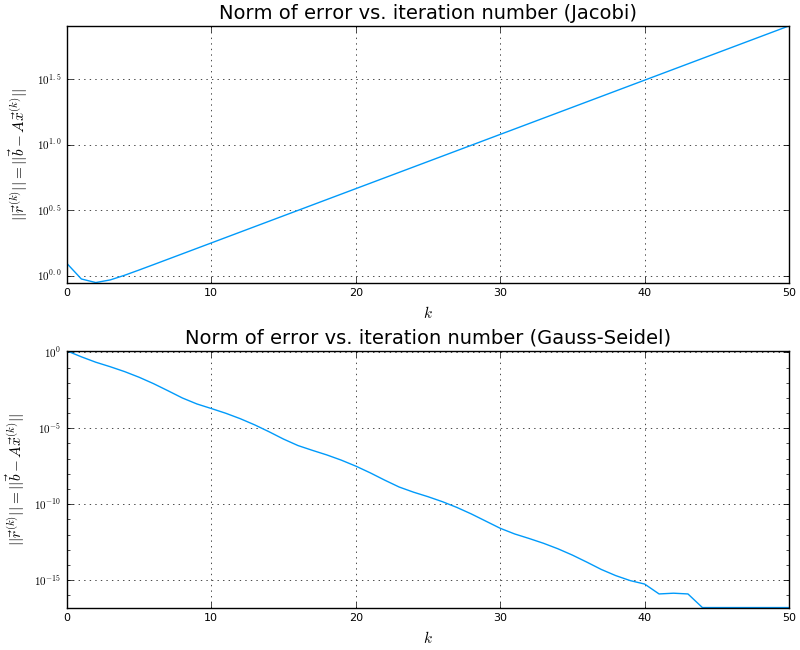

In [8]:
p1 = plot(0:50, err_jac, yscale=:log10, label="",
          xlabel=L"k",
          ylabel=L"||\vec{r}^{(k)}|| = ||\vec{b} - A\vec{x}^{(k)}||",
          title="Norm of error vs. iteration number (Jacobi)")
p2 = plot(0:50, err_GS, yscale=:log10, label="",
          xlabel=L"k",
          ylabel=L"||\vec{r}^{(k)}|| = ||\vec{b} - A\vec{x}^{(k)}||",
          title="Norm of error vs. iteration number (Gauss-Seidel)")
plot(p1, p2, layout=(2, 1), size=(800, 650))